In [75]:
import networkx as nx
import numpy as np
import queue

In [76]:
G = nx.read_weighted_edgelist('ff.edgelist', create_using=nx.DiGraph(), nodetype=int)

In [77]:
def my_dfs(G, s):
    visited = set()
    stack = queue.LifoQueue()

    stack.put(s)

    while not stack.empty():
        v = stack.get()
        if not v in visited:
            visited.add(v)
            print(v)
            for w in G.neighbors(v):
                if not w in visited:
                    stack.put(w)

In [78]:
for i in nx.all_simple_paths(G, 0, 5): print (i)

[0, 1, 2, 4, 3, 5]
[0, 1, 2, 4, 5]
[0, 1, 3, 2, 4, 5]
[0, 1, 3, 5]
[0, 2, 1, 3, 5]
[0, 2, 4, 3, 5]
[0, 2, 4, 5]


In [79]:
def find_augmentpath(N, s, t):
    P = [-1]*nx.number_of_nodes(N)
    visited = set()
    stack = queue.LifoQueue()
    stack.put(s)
    while not stack.empty():
        v = stack.get()
        if v == t:
            return (P, True)
        if not v in visited:
            visited.add(v)
        for w in N.neighbors(v):
            if w not in visited and N.edges[v, w]['weight'] != 0:
                stack.put(w)
                P[w] = v
    return (P, False)

In [80]:
find_augmentpath(G, 0, 5)

([-1, 2, 0, 4, 2, 4], True)

In [81]:
def min_capacity(N, path):
    min_cap = float('inf')
    for u,v in path:
        capacity = N.edges[u,v]['weight']
        if capacity < min_cap:
            min_cap = capacity
    return min_cap

In [82]:
def restore_shortestpath(u, v, P):
    path = []
    temp = v
    while temp != u:
        parent = P[temp]
        path.append((parent, temp))
        temp = parent
    path.reverse()
    return path

In [83]:
def increase_flow(N, path, amount, flow):
    for (u,v) in path:
        if flow[u,v] <= 0: flow[(u,v)] += amount
        else:
            diff = flow[(v, u)] - amount
            if diff >= 0:
                flow[(v, u)] = diff
            else:
                flow[(u, v)] = -diff
                flow[(v, u)] = 0

        N.edges[u,v]['weight'] -= amount
        if N.has_edge(v,u):
            N.edges[v,u]['weight'] += amount
        else:
            N.add_edge(v, u, weight=amount)


In [85]:
def my_Ford_Fulkerson(G, s, t):
    N = G.copy()
    f = {}
    for u,v in N.edges:
        f[(u,v)] = 0
        f[(v,u)] = 0
    P, is_found = find_augmentpath(N,s,t)
    while is_found:
        augmentpath = restore_shortestpath(s,t,P)
        min_cap = min_capacity(N, augmentpath)
        increase_flow(N, augmentpath, min_cap, f)
        P, is_found = find_augmentpath(N,s,t)
    return N, f

{(0, 1): 10.0, (1, 0): 0, (0, 2): 4.0, (2, 0): 4.0, (1, 2): 0, (2, 1): 2.0, (1, 3): 2.0, (3, 1): 2.0, (2, 4): 4.0, (4, 2): 4.0, (3, 2): 0, (2, 3): 0, (3, 5): 7.0, (5, 3): 7.0, (4, 3): 7.0, (3, 4): 0, (4, 5): 4.0, (5, 4): 0}


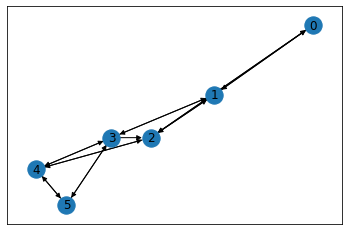

In [88]:
N, res = my_Ford_Fulkerson(G, 0, 5)
nx.draw_networkx(N)
print(res)